# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## Import data and modules

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('all_data.csv')

## Inspect data
2 qualitative fields (life expectancy, gdp); 2 categorical fields (country, year)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


### Create calculated fields

In [24]:
data['gdp_billions'] = data['GDP'] / 1000000000

### Explore *year*

Data is available for the years 2000 - 2015

In [25]:
data['Year'].value_counts()

2015    6
2014    6
2013    6
2012    6
2011    6
2010    6
2009    6
2008    6
2007    6
2006    6
2005    6
2004    6
2003    6
2002    6
2001    6
2000    6
Name: Year, dtype: int64

### Explore *country*

Data is available for United States of America, Mexico, Germany, Chile, Zimbabwe, and China   

In [26]:
data['Country'].value_counts()

Chile                       16
Germany                     16
Mexico                      16
Zimbabwe                    16
China                       16
United States of America    16
Name: Country, dtype: int64

## Explore *gdp*

In [27]:
data['gdp_billions'].min()

4.4157028

In [28]:
data['gdp_billions'].max()

18100.0

In [29]:
data['gdp_billions'].mean()

3880.4985707683954

In [30]:
data['gdp_billions'].median()

1280.22

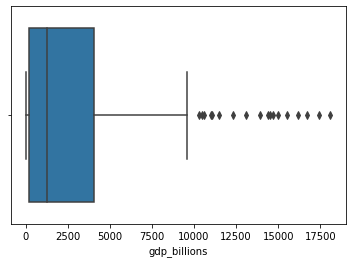

In [31]:
sns.boxplot(x='gdp_billions', data=data)
plt.show()

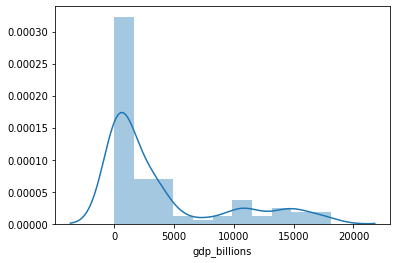

In [38]:
sns.distplot(data['gdp_billions'])
plt.show()

### Explore *life epectancy*

In [33]:
data['Life expectancy at birth (years)'].min()

44.3

In [34]:
data['Life expectancy at birth (years)'].max()

81.0

In [35]:
data['Life expectancy at birth (years)'].median()

76.75

In [36]:
data['Life expectancy at birth (years)'].mean()

72.78958333333334

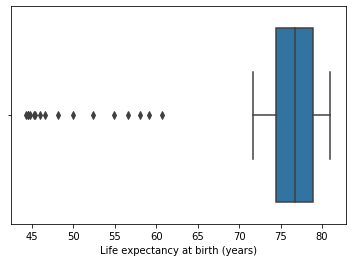

In [37]:
sns.boxplot(x='Life expectancy at birth (years)', data=data)
plt.show()

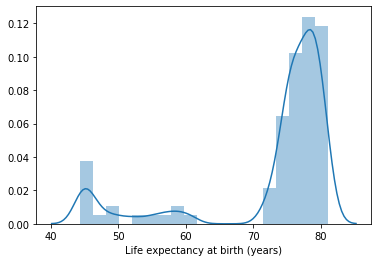

In [39]:
sns.distplot(data['Life expectancy at birth (years)'])
plt.show()

## Explore relationships between the variables

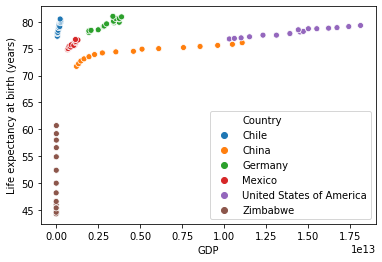

In [41]:
sns.scatterplot(x = 'GDP', y = 'Life expectancy at birth (years)', data = data, hue = 'Country')
plt.show()

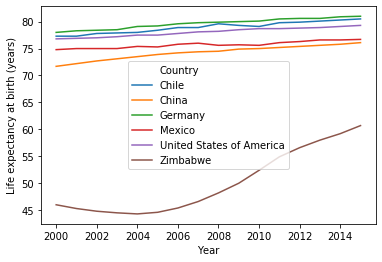

In [43]:
sns.lineplot(data=data, x="Year", y='Life expectancy at birth (years)', hue = 'Country')
plt.show()